In [27]:
import pandas as pd
import numpy as np

In [28]:
# reading the data
df=pd.read_csv("monthly-car-sales.csv",parse_dates=['Month'],index_col=['Month'])
df.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [29]:
df.dtypes

Sales    int64
dtype: object

In [30]:
df.tail()

,Sales
Month,
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342
1968-11-01,17180
1968-12-01,14577


In [31]:
df.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


In [32]:
df.shape

(108, 1)

In [33]:
df.count()

Sales    108
dtype: int64

In [34]:
df.dtypes

Sales    int64
dtype: object

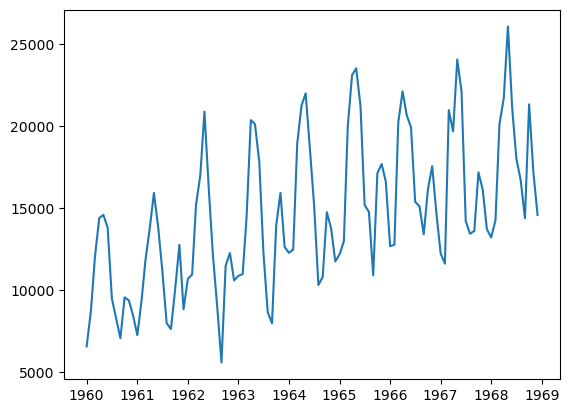

In [35]:
import matplotlib.pyplot as plt
plt.plot(df)

<Axes: xlabel='Month'>

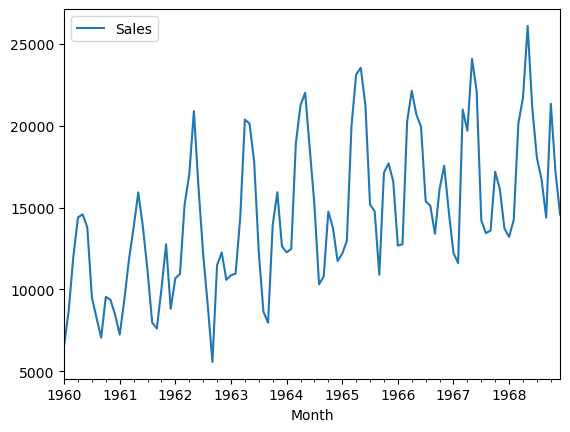

In [36]:
df[:2000].plot()

In [37]:
from statsmodels.tsa.stattools import adfuller

In [38]:
# Checking for Stationary
result=adfuller(df['Sales'],autolag='AIC')

print("p-value :", result[1])
# data is unstable

p-value : 0.6632691049832871


In [39]:
# Applying Differencing
df['Sales_diff']=df['Sales']-df['Sales'].shift(9)
df.head(15)

,Sales,Sales_diff
Month,,
1960-01-01,6550,NaN
1960-02-01,8728,NaN
1960-03-01,12026,NaN
1960-04-01,14395,NaN
1960-05-01,14587,NaN
1960-06-01,13791,NaN
1960-07-01,9498,NaN
1960-08-01,8251,NaN
1960-09-01,7049,NaN


In [40]:
df.dropna(subset=['Sales_diff'],inplace=True)

In [41]:
df.head()

,Sales,Sales_diff
Month,,
1960-10-01,9545,2995.0
1960-11-01,9364,636.0
1960-12-01,8456,-3570.0
1961-01-01,7237,-7158.0
1961-02-01,9374,-5213.0


In [42]:
result=adfuller(df['Sales_diff'],autolag='AIC')

print("p-value :", result[1])

p-value : 0.2010146184647575


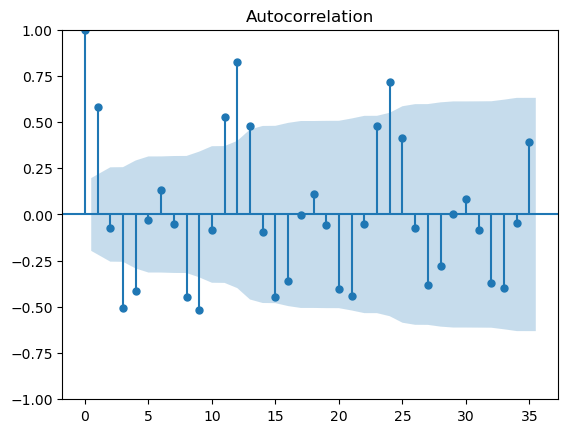

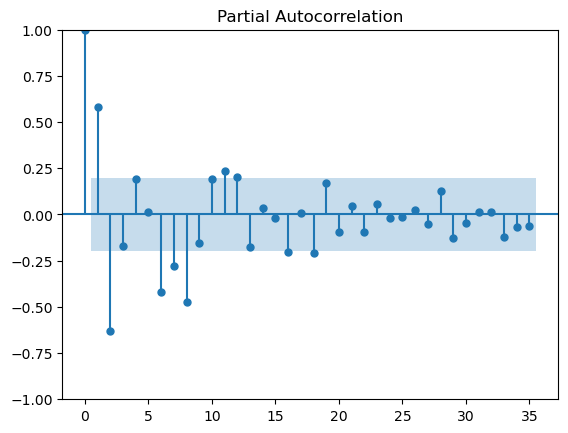

In [43]:
# Plotting acf and pacf graph
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

acf=plot_acf(df['Sales_diff'],lags=35)
pacf=plot_pacf(df['Sales_diff'],lags=35)

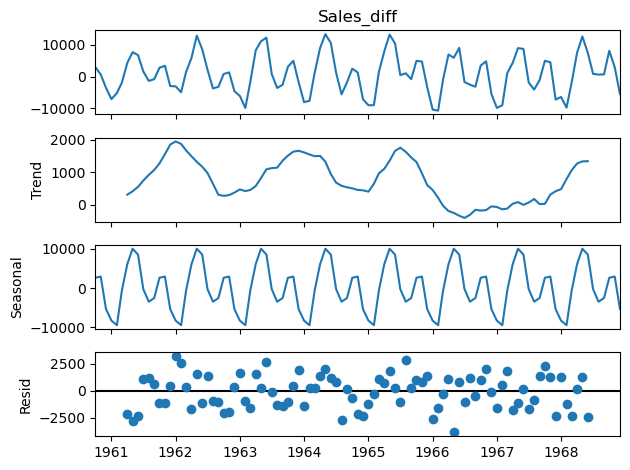

In [44]:
# Applying Seasonal Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

decompose=seasonal_decompose(df['Sales_diff'],model='Additive')
decompose.plot()

plt.show()

In [45]:
adf_test=adfuller(df['Sales_diff'])
print("P-value :", adf_test[1])

P-value : 0.2010146184647575


In [46]:
# Applying ARIMA model

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

train,test=train_test_split(df['Sales_diff'],test_size=0.2,shuffle=False)

model=ARIMA(train,order=(0,1,0))
model_fit=model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Sales_diff   No. Observations:                   79
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -782.225
Date:                Wed, 09 Apr 2025   AIC                           1566.451
Time:                        09:57:12   BIC                           1568.807
Sample:                    10-01-1960   HQIC                          1567.394
                         - 04-01-1967                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.969e+07   5.86e+06      5.069      0.000    1.82e+07    4.12e+07
Ljung-Box (L1) (Q):                   9.61   Jarque-Bera (JB):                 1.73
Prob(Q):                              0.00   Pr

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


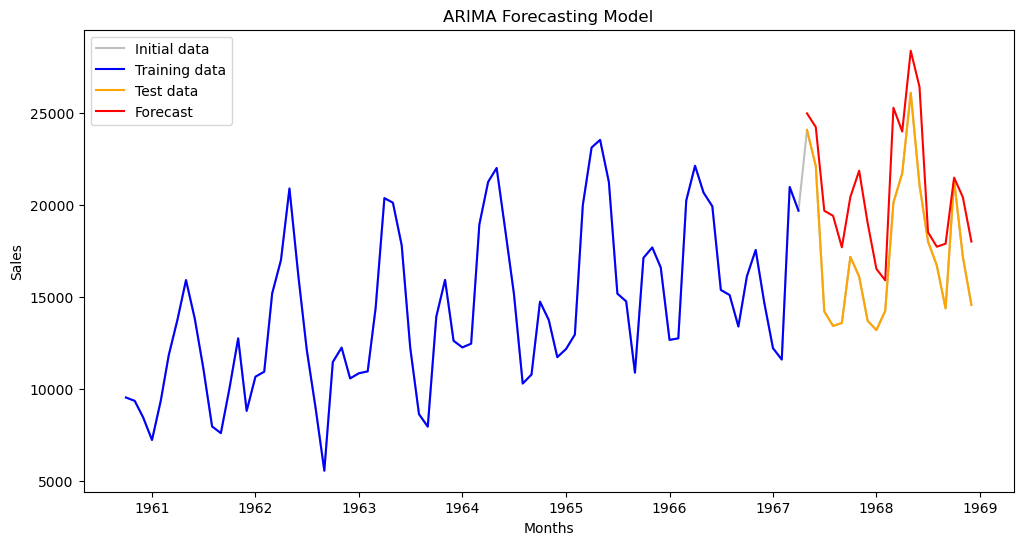

Forecast for the test data (in the initial scale):
1967-05-01    24981.0
1967-06-01    24237.0
1967-07-01    19692.0
1967-08-01    19417.0
1967-09-01    17705.0
1967-10-01    20439.0
1967-11-01    21866.0
1967-12-01    19024.0
1968-01-01    16529.0
1968-02-01    15912.0
1968-03-01    25289.0
1968-04-01    23996.0
1968-05-01    28385.0
1968-06-01    26418.0
1968-07-01    18524.0
1968-08-01    17738.0
1968-09-01    17902.0
1968-10-01    21491.0
1968-11-01    20423.0
1968-12-01    18017.0
Freq: MS, dtype: float64


In [47]:
# Forecasting
forecast=model_fit.forecast(steps=len(test))

forecast_original=forecast+df['Sales'].shift(12).loc[test.index]

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Sales'], label='Initial data', color='gray', alpha=0.5)
plt.plot(train.index, df['Sales'].loc[train.index], label='Training data', color='blue')
plt.plot(test.index, df['Sales'].loc[test.index], label='Test data', color='orange')
plt.plot(forecast.index, forecast_original, label='Forecast', color='red')
plt.title('ARIMA Forecasting Model')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.legend()
plt.show()

print('Forecast for the test data (in the initial scale):')
print(forecast_original)